In [1]:
import draftAnal as DA
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import pickle as pk
import seaborn as sns

### Load the Data

In [2]:
Authors = pk.load( open( "./Data/OUTPUT/Data_09_09.p", "rb" ) )

/Users/cosy/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


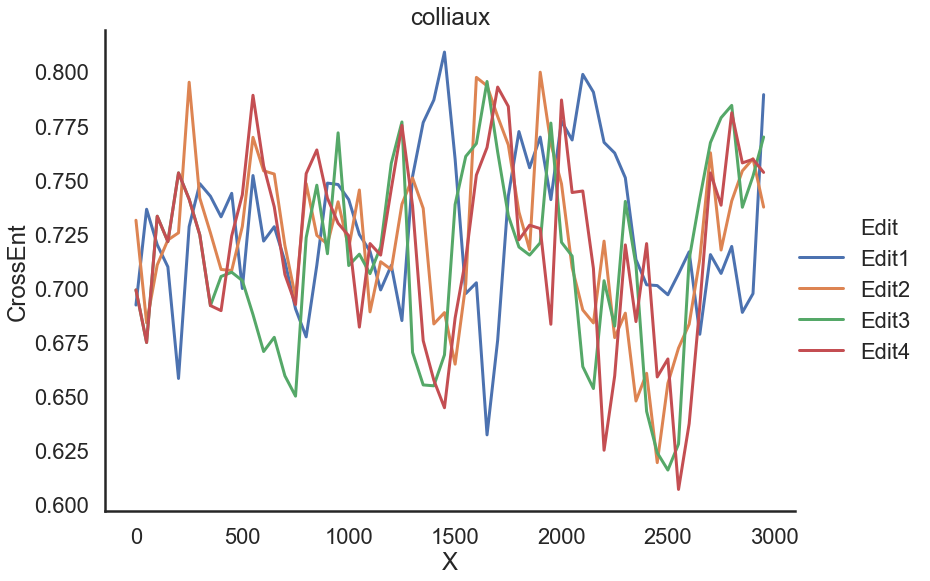

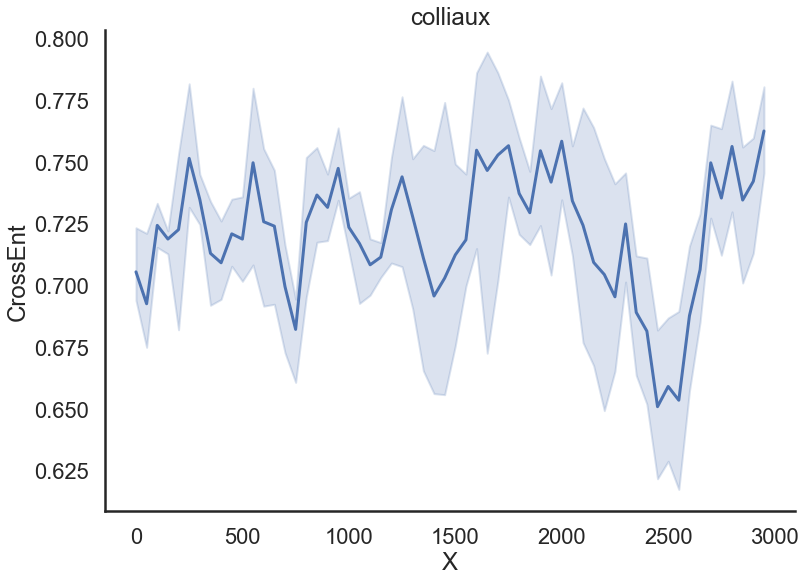

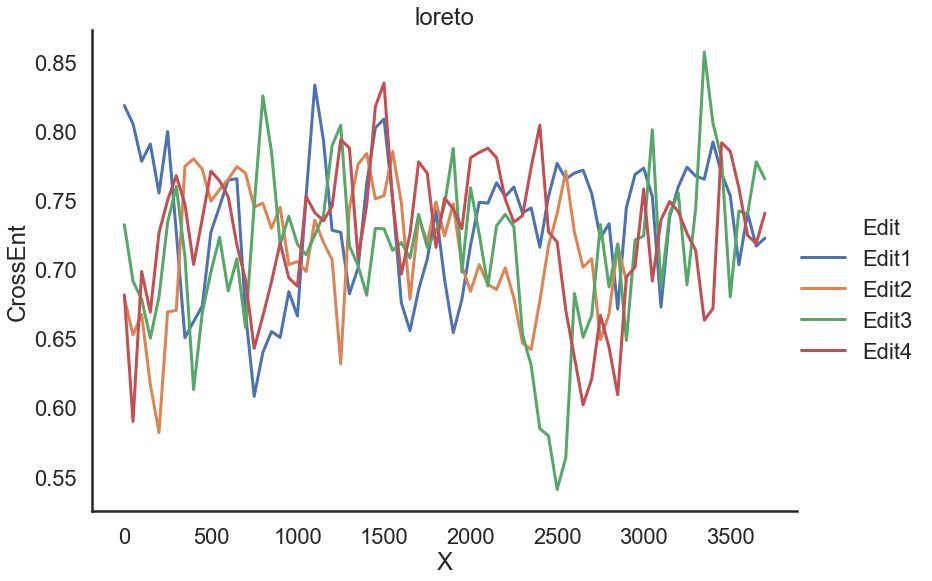

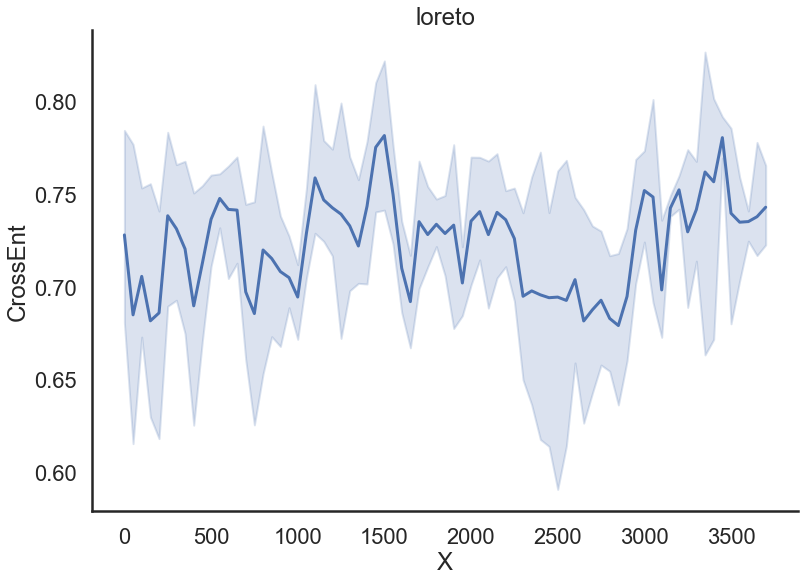

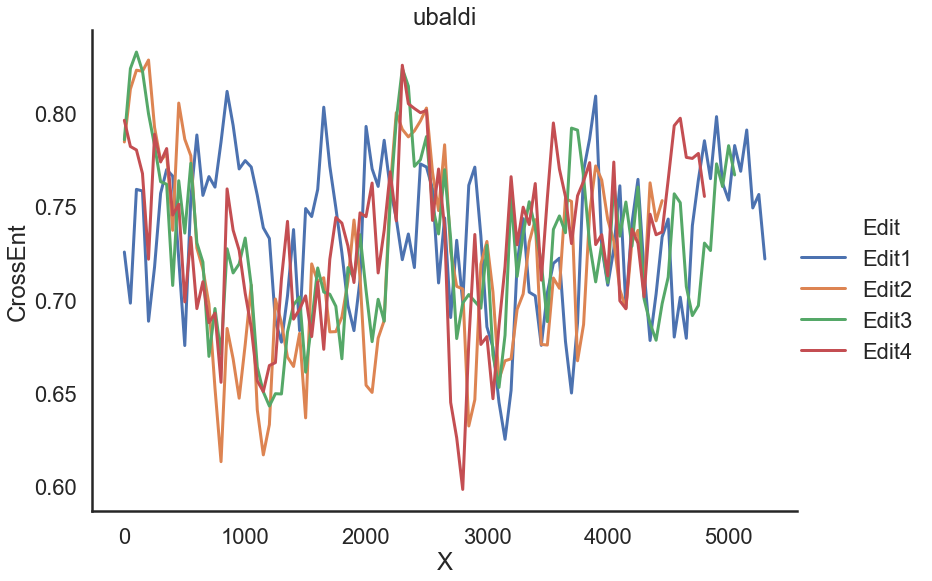

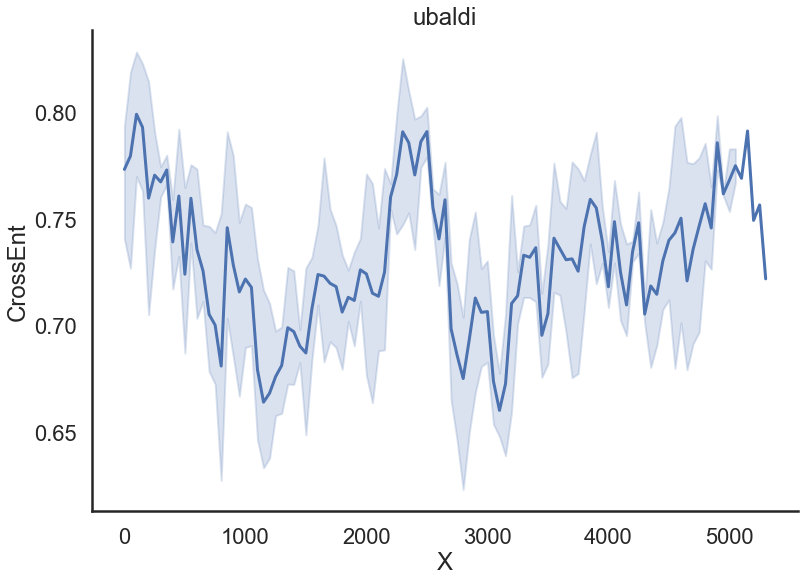

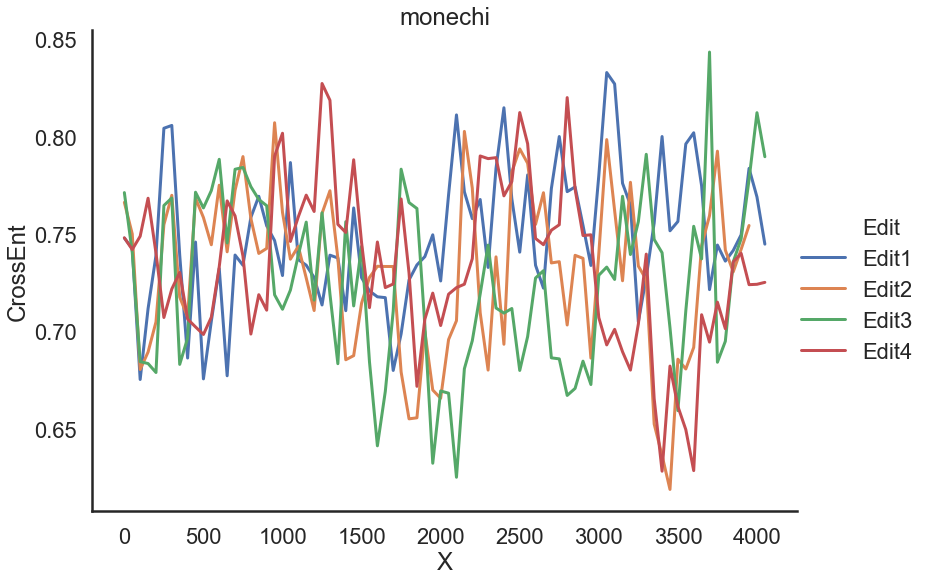

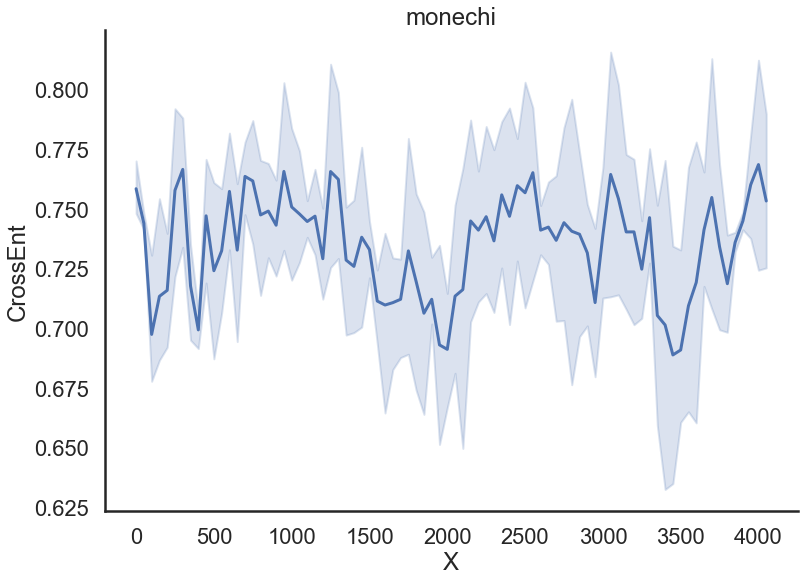

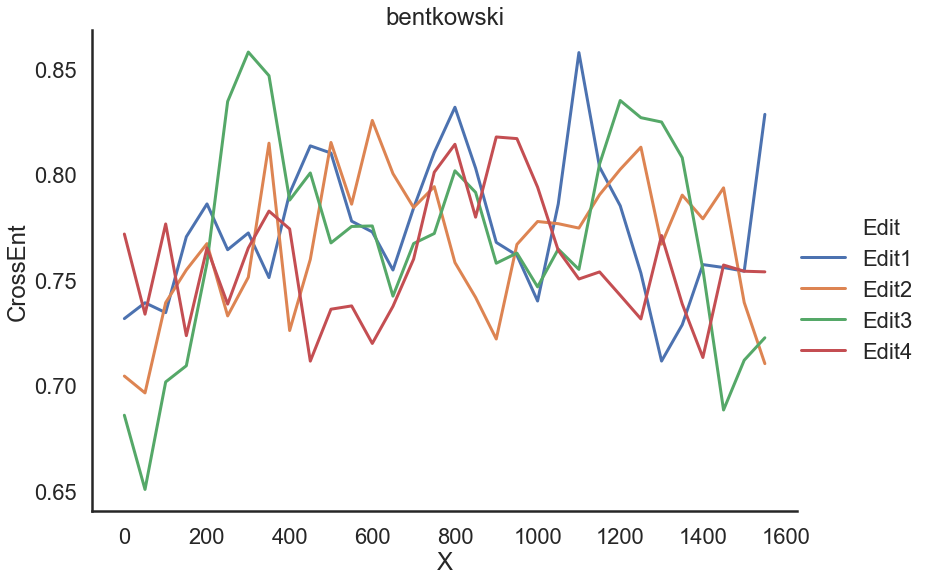

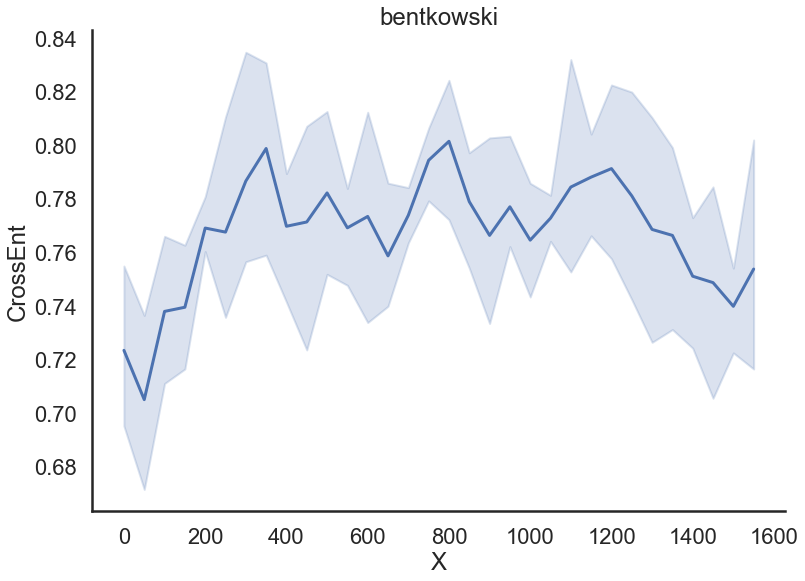

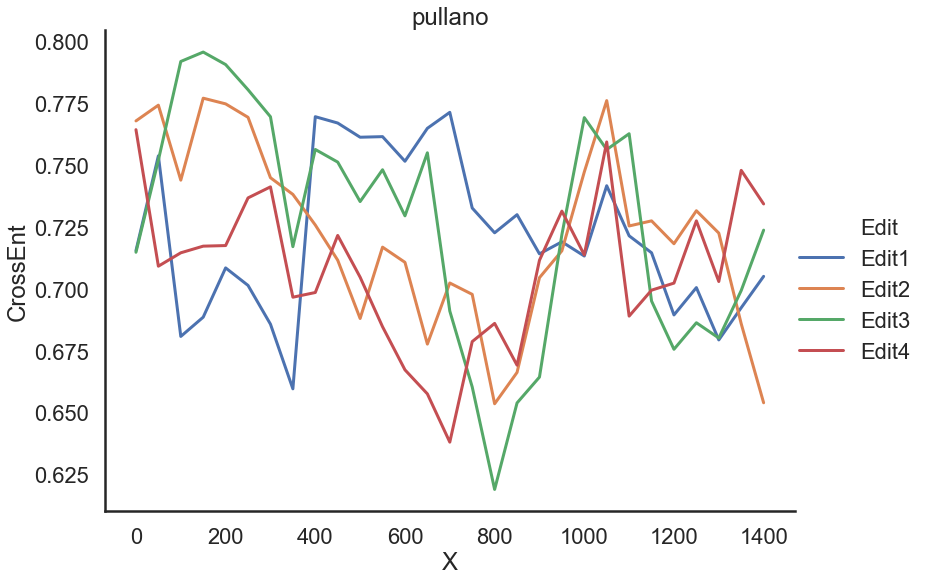

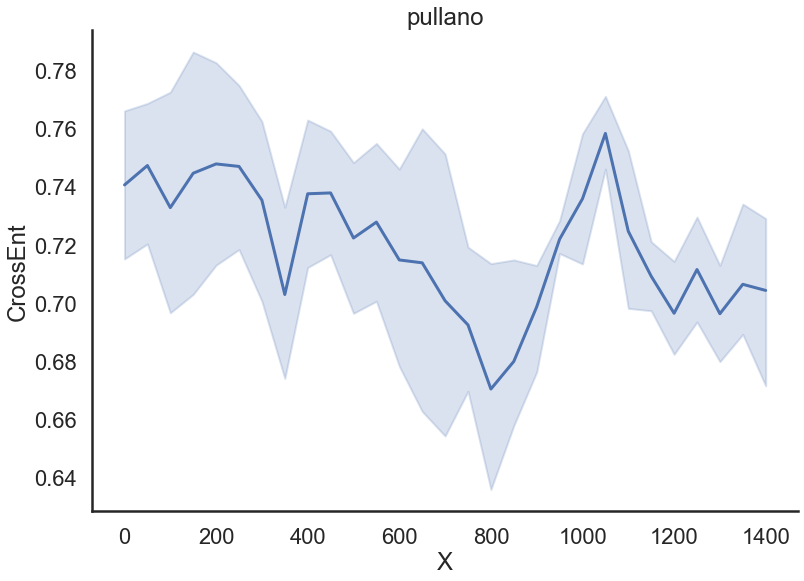

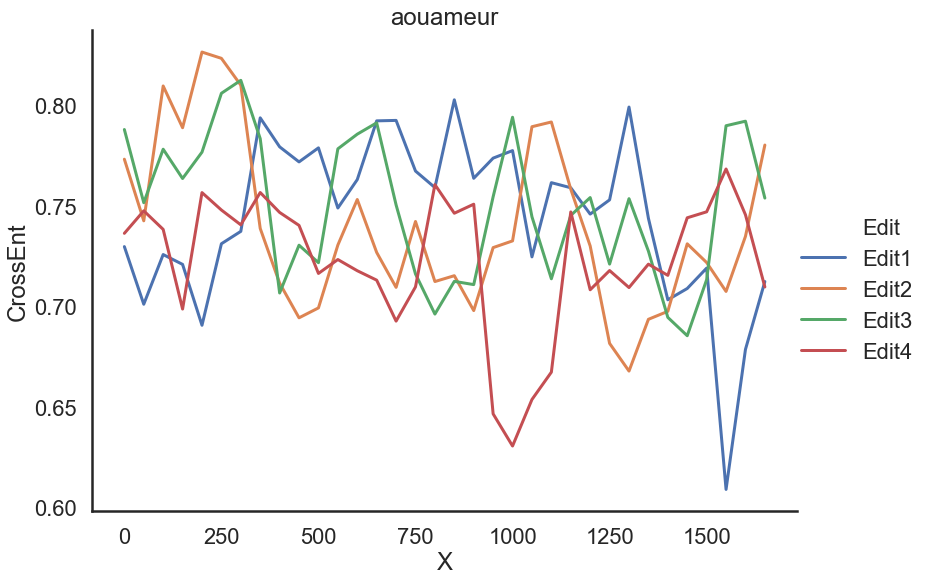

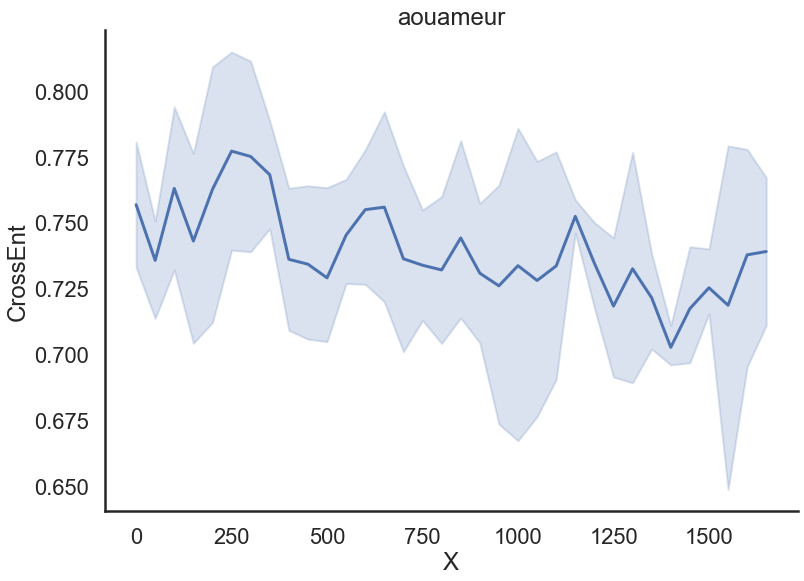

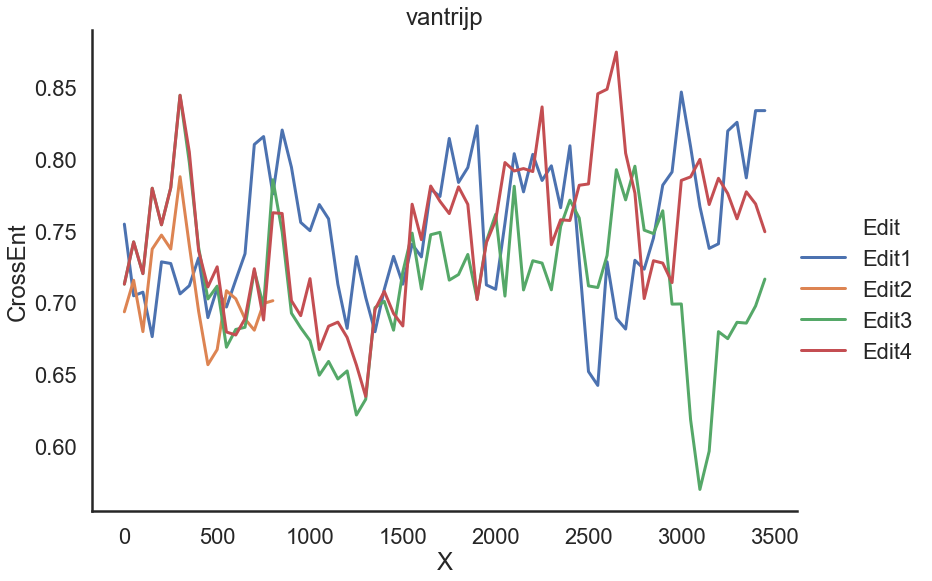

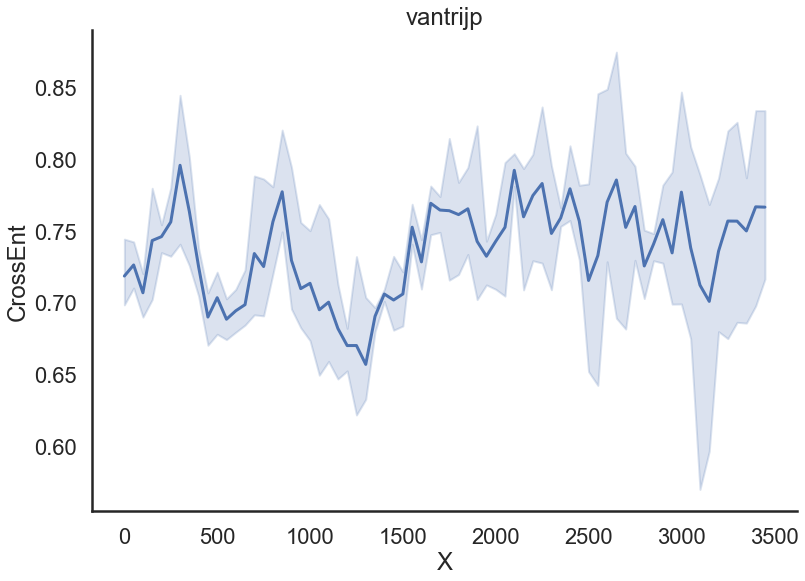

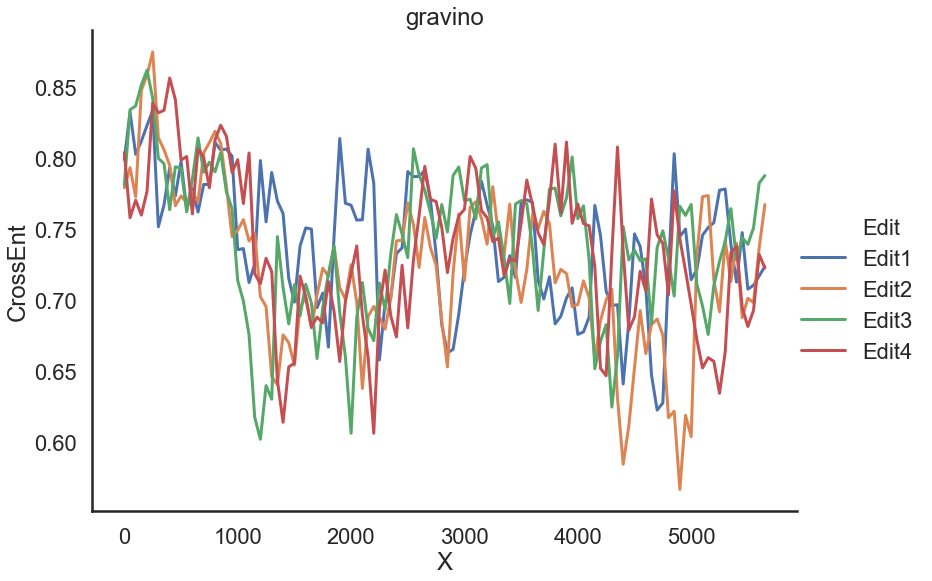

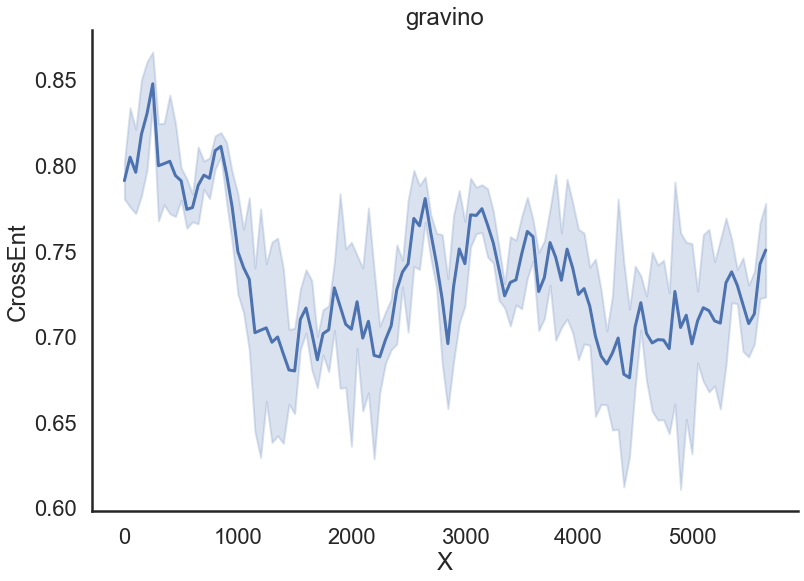

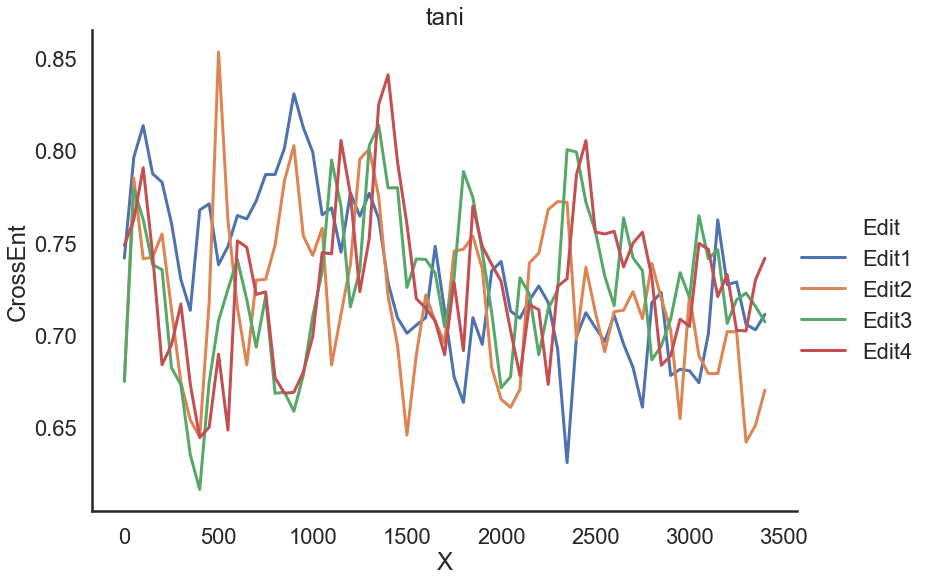

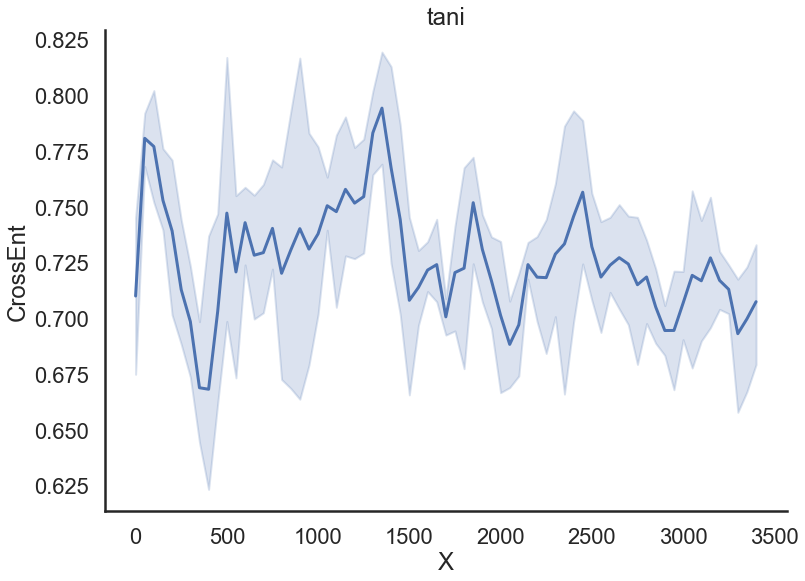

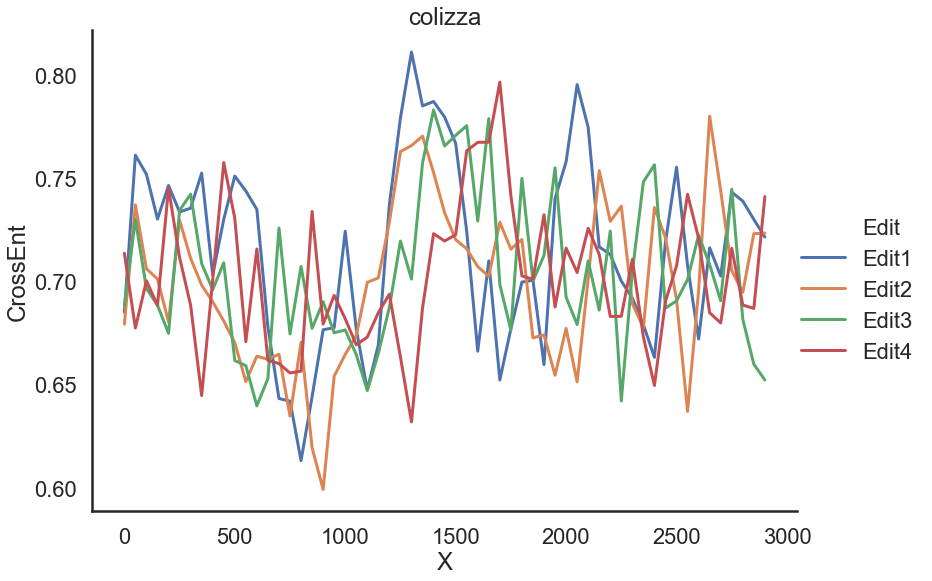

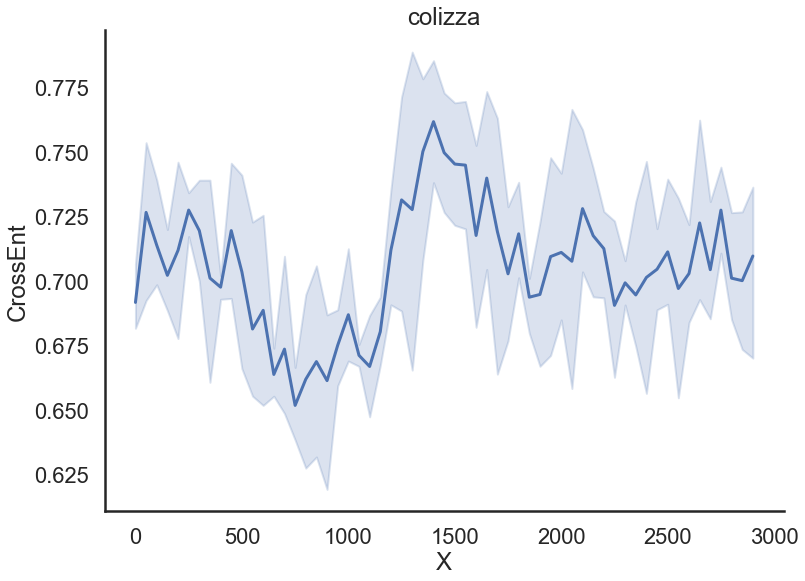

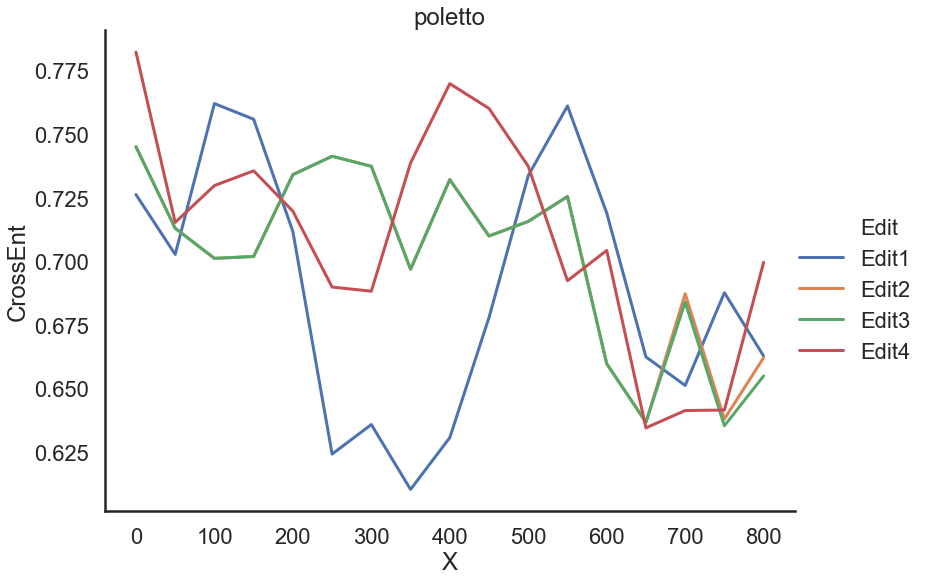

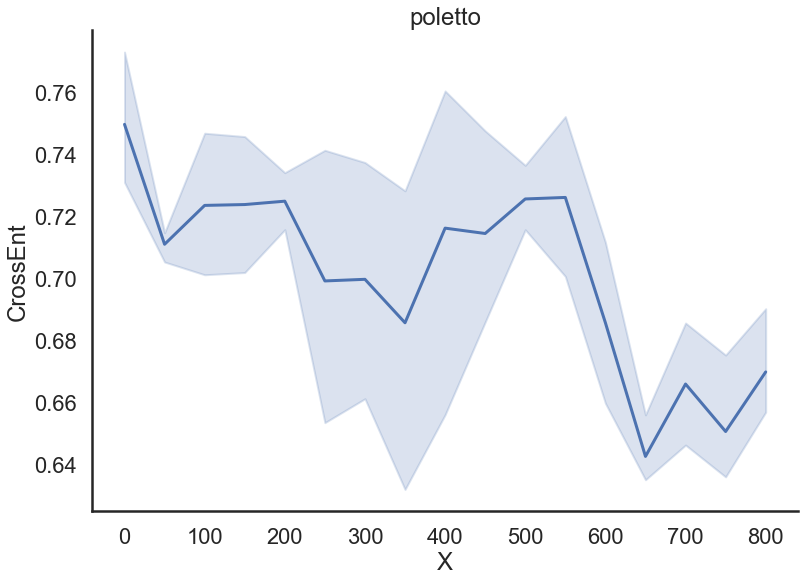

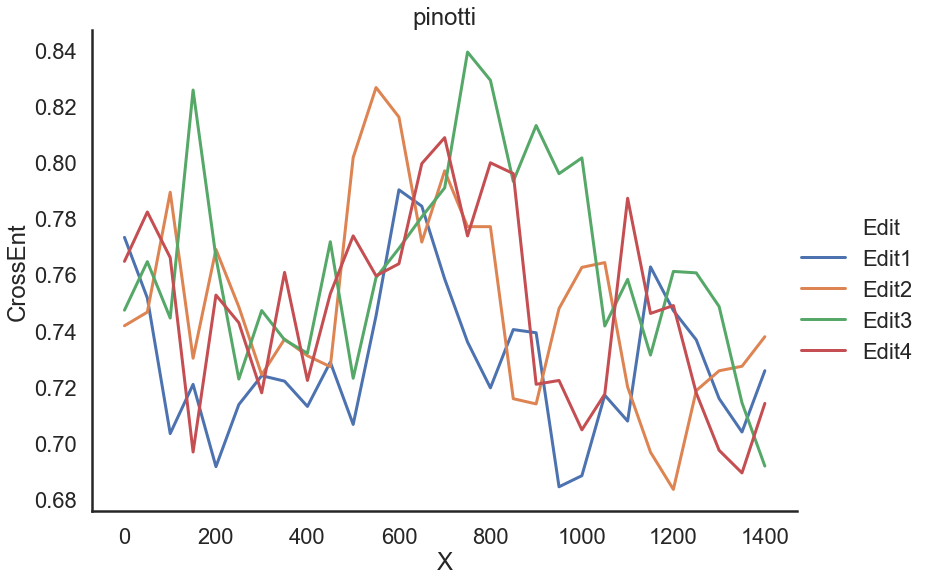

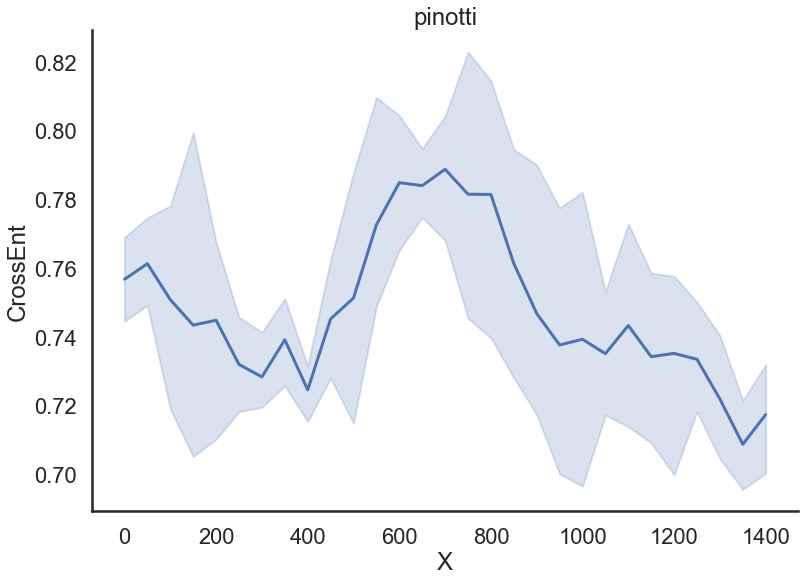

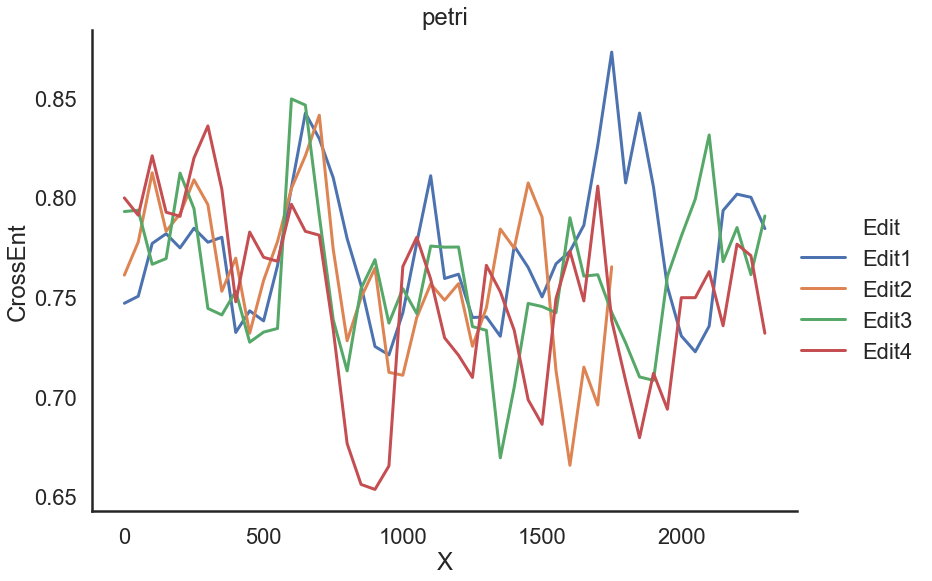

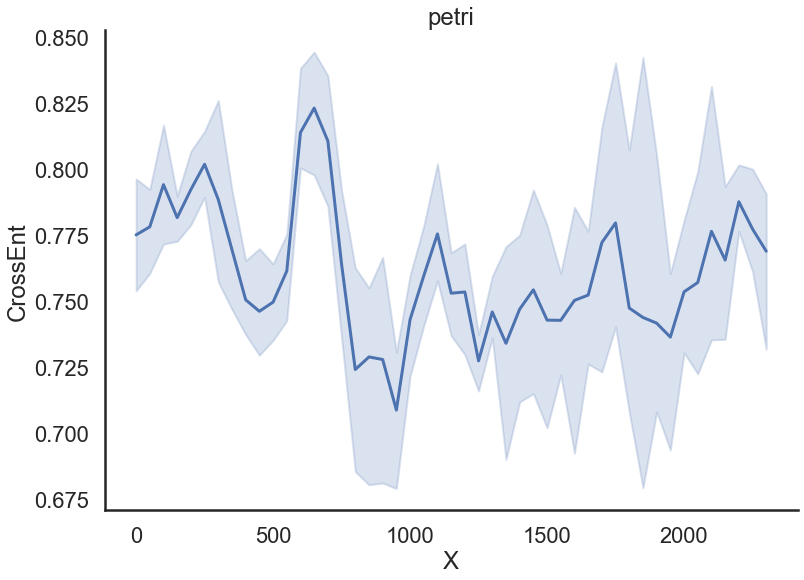

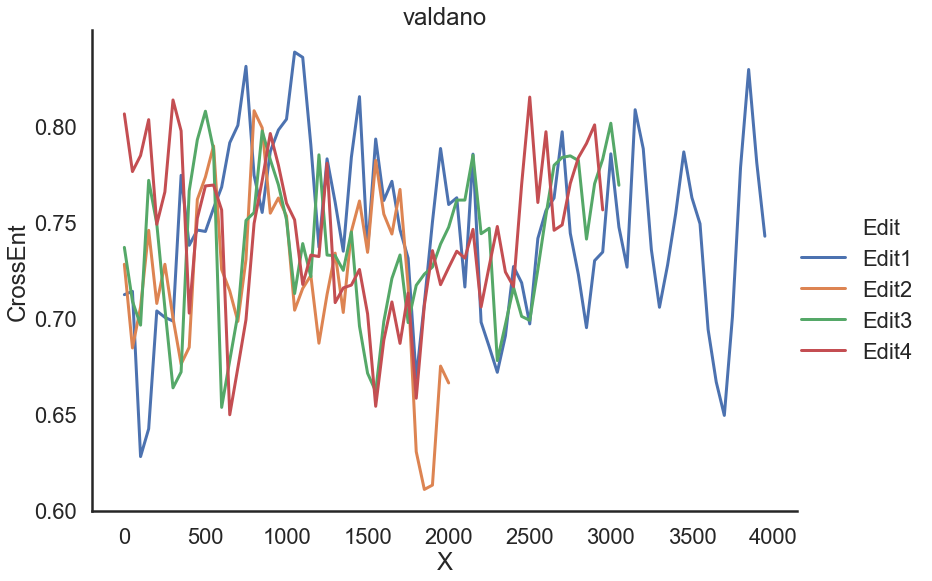

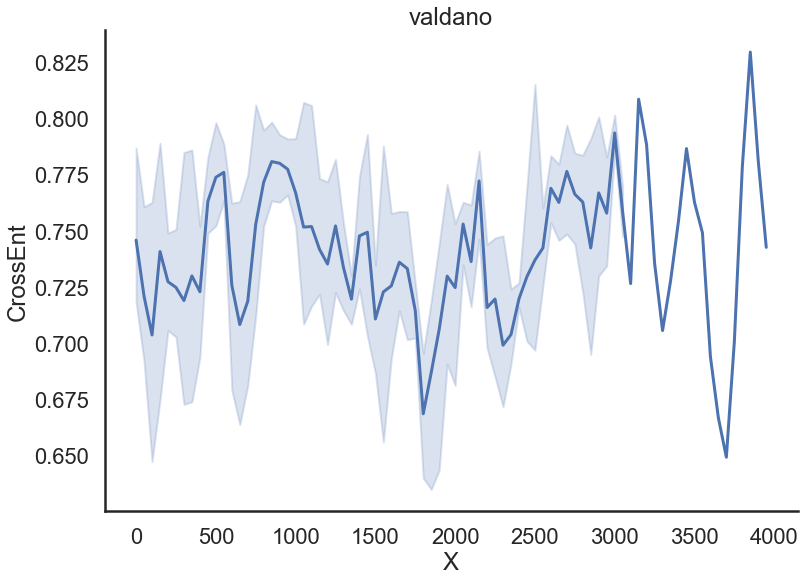

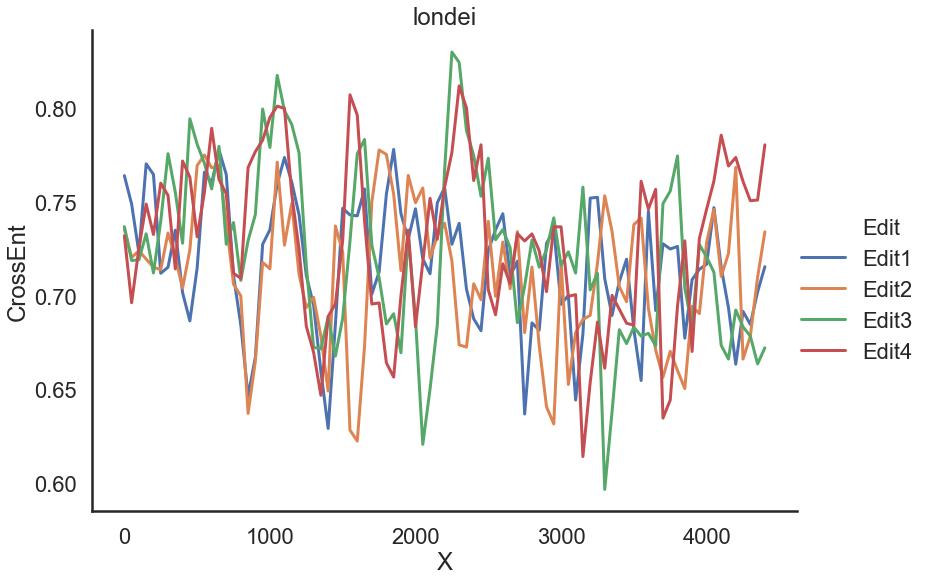

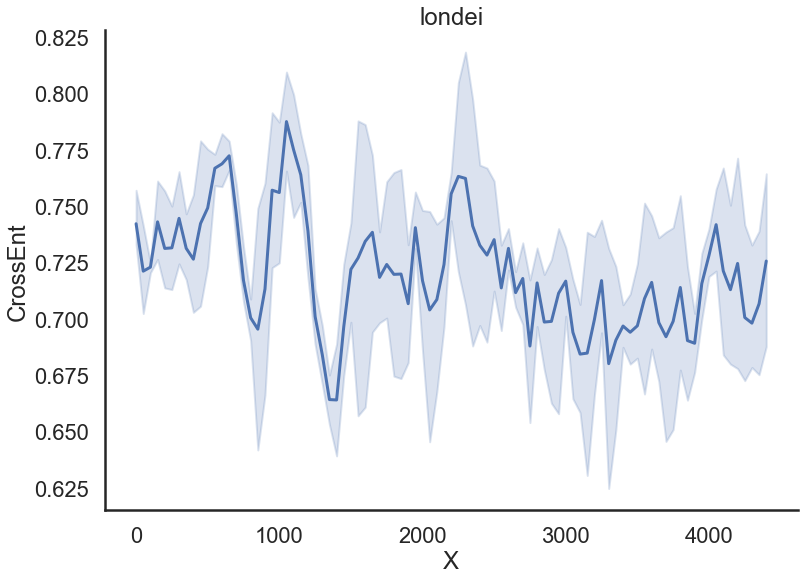

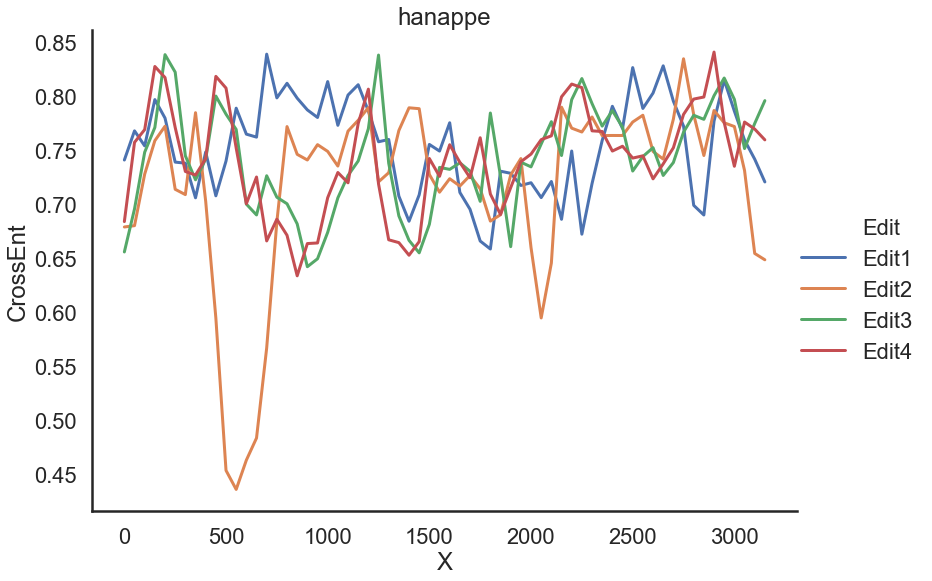

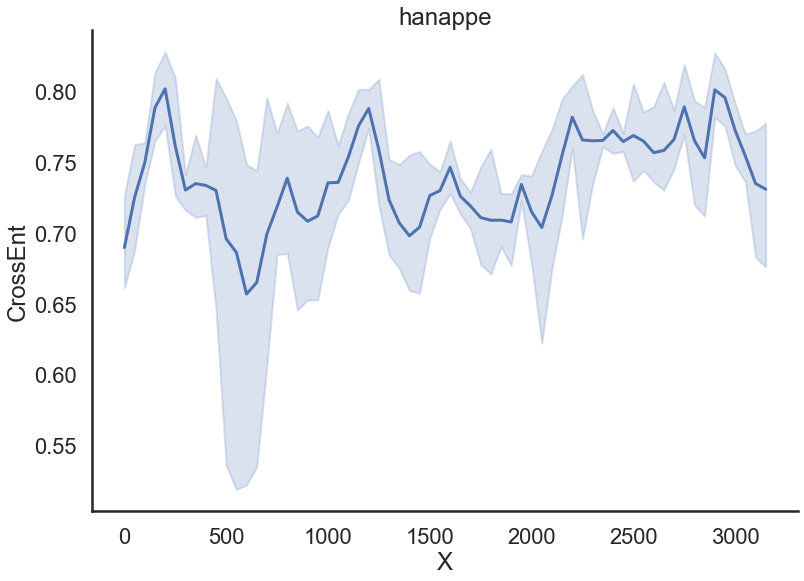

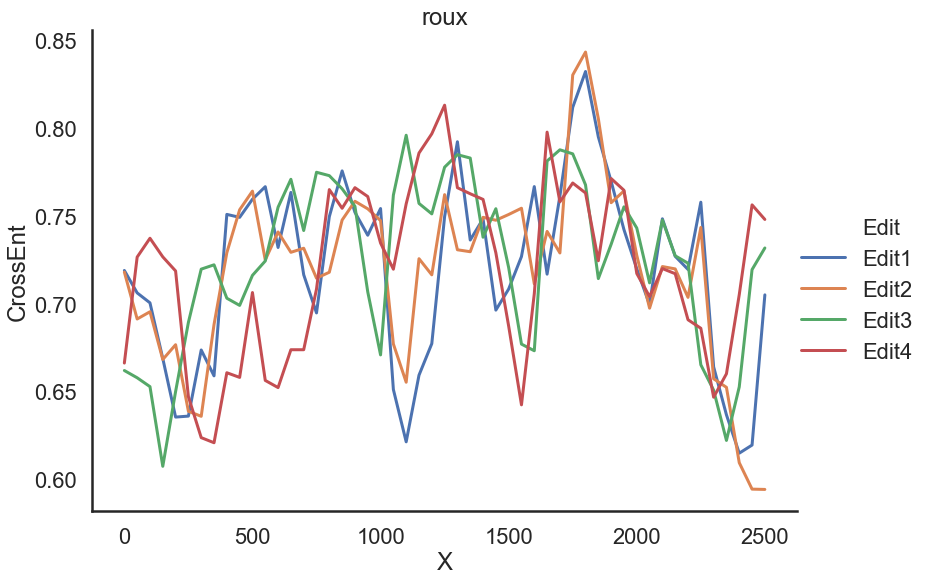

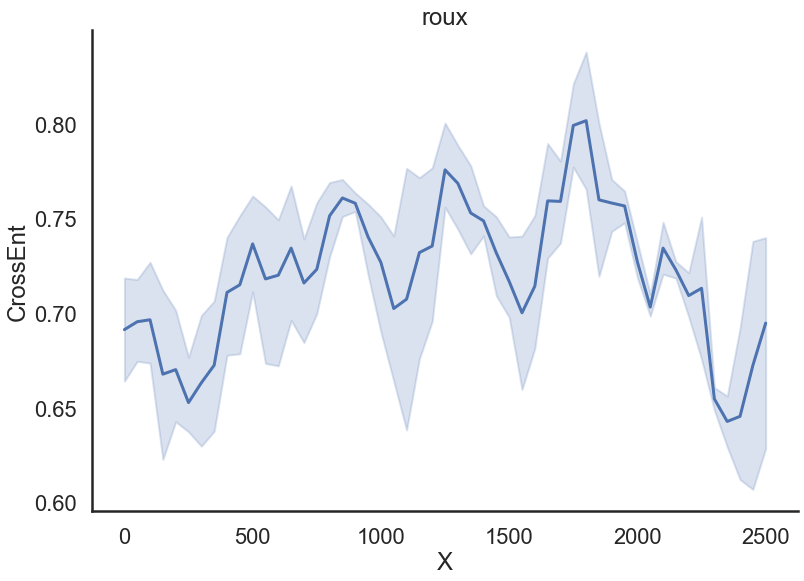

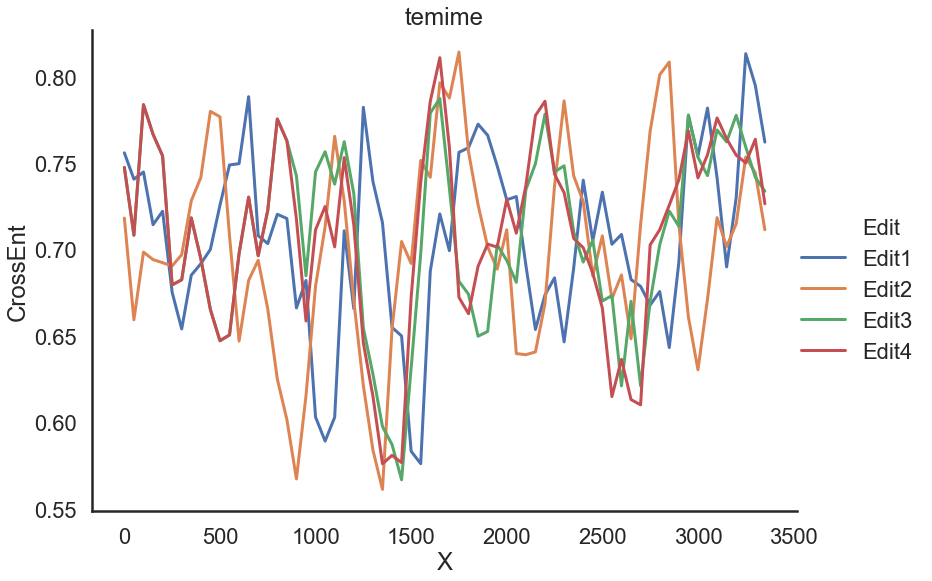

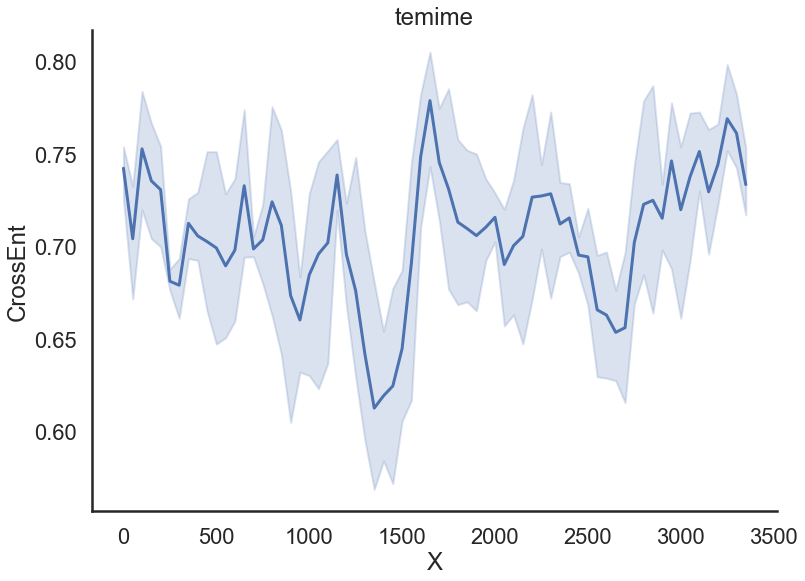

In [13]:
# fig = plt.figure(figsize=(14,6))
# ax2 = fig.add_axes([1,1,1,1])
# fig = plt.figure(figsize=(14,6))
# ax3 = fig.add_axes([1,1,1,1])
# fig = plt.figure(figsize=(14,6))
# ax4 = fig.add_axes([1,1,1,1])
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("white")
sns.set_context("poster")
for author in Authors:
    count1 = dt.strptime('01_01_01_01_2019', '%d_%m_%H_%M_%Y')
    count2 = dt.strptime('01_01_01_01_2019', '%d_%m_%H_%M_%Y')
    count3 = dt.strptime('01_01_01_01_2019', '%d_%m_%H_%M_%Y')
    count4 = dt.strptime('01_01_01_01_2019', '%d_%m_%H_%M_%Y')
    for i,draft in enumerate(author.drafts):
        if draft.Cname.split("_")[4] == '1':
            if count1<dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y'):
                count1 = dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y')
                lastMacro1 = i
        elif draft.Cname.split("_")[4] == '2':
            if count2<dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y'):
                count2 = dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y')
                lastMacro2 = i
        elif draft.Cname.split("_")[4] == '3':
            if count3<dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y'):
                count3 = dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y')
                lastMacro3 = i
        elif draft.Cname.split("_")[4] == '4':
            if count4<dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y'):
                count4 = dt.strptime(str(draft.tag)+'_2019', '%d_%m_%H_%M_%Y')
                lastMacro4 = i
        else:
            print('weird data input ad: '+draft.Cname)

    df = author.drafts[lastMacro1].sliding.data
    df = df.reset_index()
    df['X'] = df['index']*50
    df['Edit1'] =df[0]
    del(df[0])
    df['Edit2'] = author.drafts[lastMacro2].sliding.data[0]
    df['Edit3'] = author.drafts[lastMacro3].sliding.data[0]
    df['Edit4'] = author.drafts[lastMacro4].sliding.data[0]
    df['Author'] = author.name


    df = df.melt(id_vars=['index', 'X', 'Author'], var_name='Edit', value_name='CrossEnt')
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df, hue='Edit',
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)
    
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df,
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)